# Sampleo por Importancia con Re-muestreo (SIR)
En el contexto de muestreo de variables aleatorias cuando no podemos aplicar métodos directos como la función inversa o el Box-Muller, el Sampleo por Importancia con Re-muestreo (SIR) es una técnica útil. Este método nos permite obtener muestras aproximadas de una distribución objetivo $p(z)$ cuando es difícil muestrear directamente de ella, utilizando una distribución de propuesta más fácil $q(z)$.



Los pasos clave son:

1. Distribución de Propuesta q(z): Debe ser fácil de muestrear y cubrir el soporte de p(z).

2. Muestreo de q(z): Generar $L$ muestras $z_1, z_2 , \dots, z_L$ de $q(z)$.

3. Pesos de Importancia: Calcular los pesos $w_1, w_2, \dots, w_L$ para ajustar las muestras hacia p(z).

4. Re-muestreo: Seleccionar $N$ nuevas muestras utilizando los pesos.

5. Generar el histograma normalizado.




# Ejercicio 1

Asumiendo que $p(x) =f_X(x)$ donde $X \sim e(3)$.

a) Realizar $z_1, z_2, \dots, z_L$ muestras a partir de una distribucion $q(z)$ facil de samplear (que no sea exponencial).  
b) Ordenar los $z_i$   
c) Calcular sus pesos $w_i = \frac{p(z_i)}{q(z_i)}$   
d) Calcular su función **acumulada** $F_Z(z)$ siendo $Z$ la distribucion a partir de las muestras $z_1, z_2, \dots, z_N$



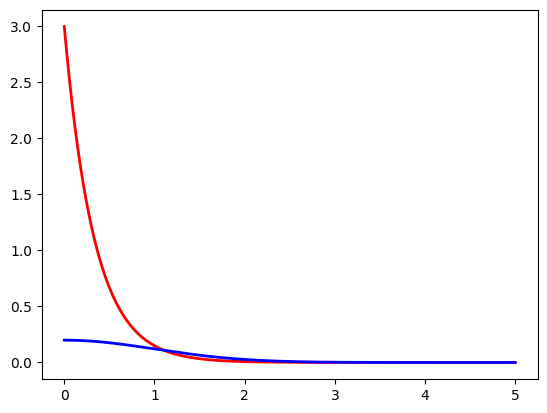

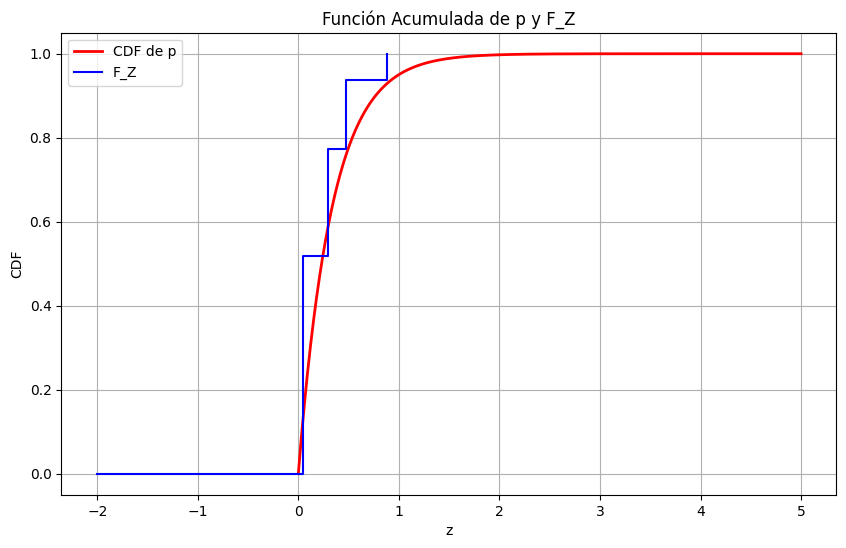

10
Rechazo H0


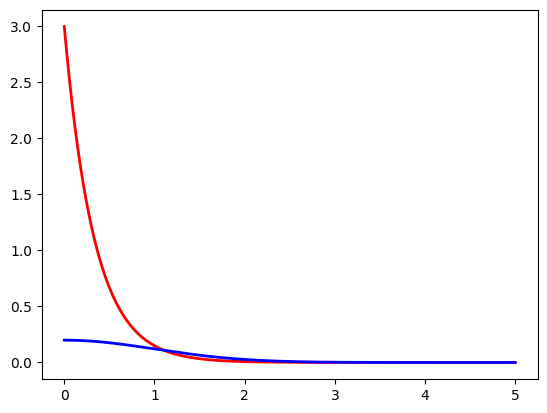

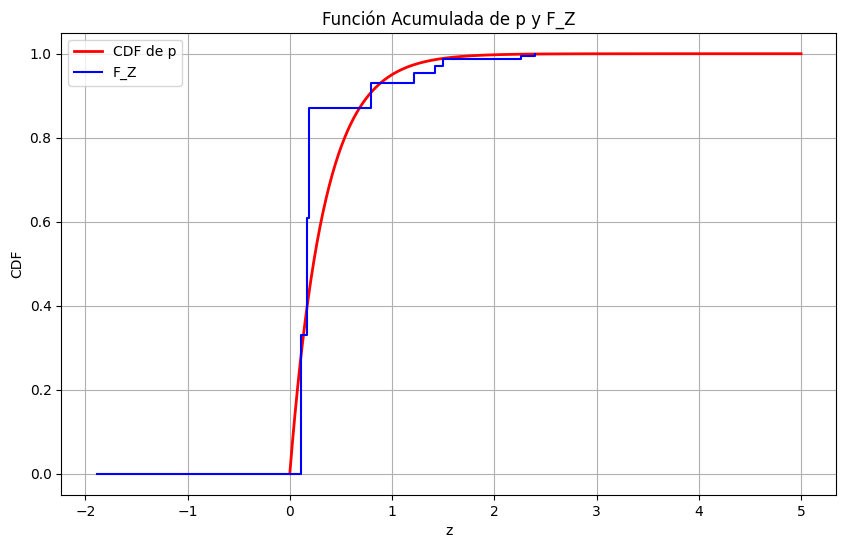

25
Rechazo H0


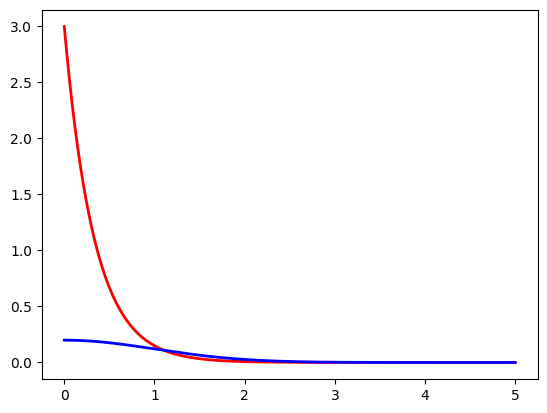

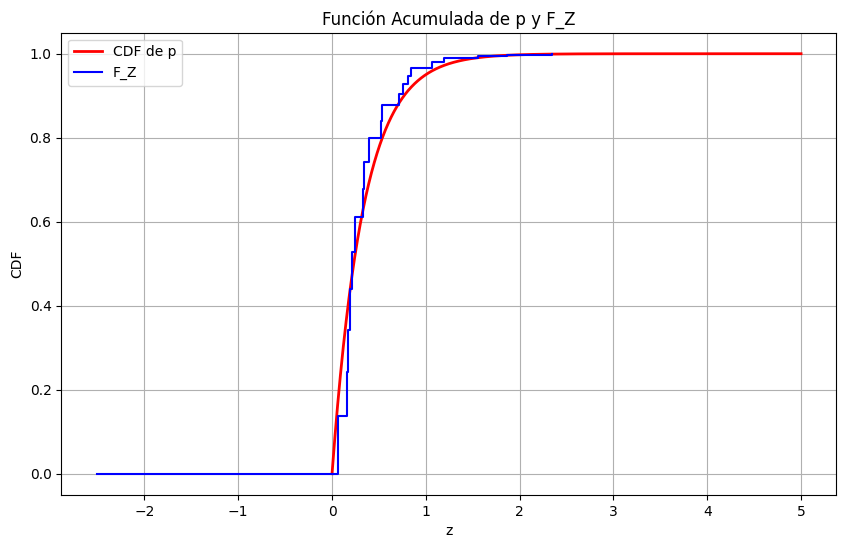

50
Acepto H0


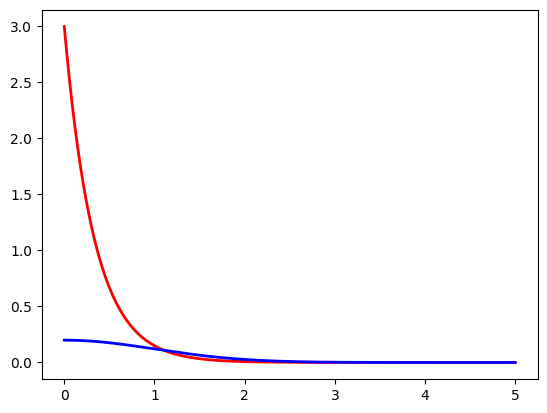

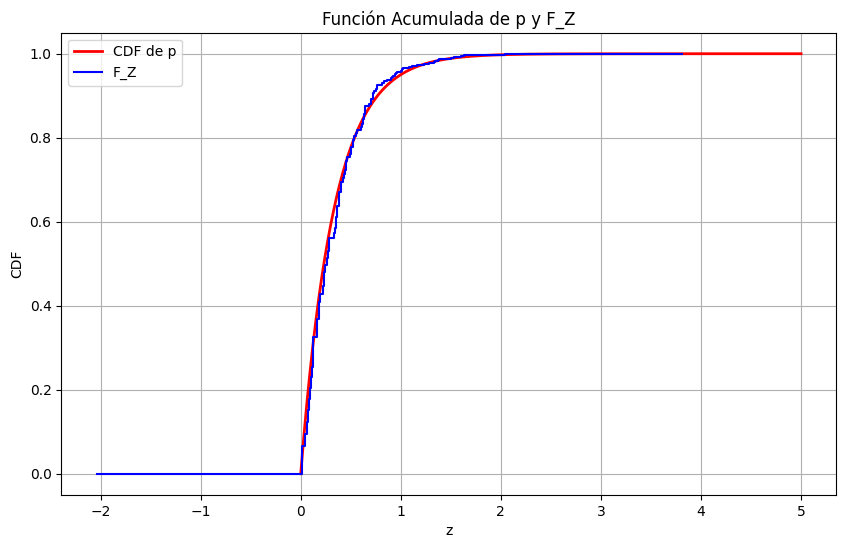

200
Acepto H0


In [21]:
# Completar Ej1
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

# Definimos la distribución
# normalizar la exponencial

for L in [10, 25, 50, 200]:
    # Normalizamos la distribución exponencial
    p = stats.expon(scale=1/3)


    q = stats.norm(loc=0, scale=1)

    # Generamos la muestra
    n = 1000
    x = np.linspace(0, 5, n)
    plt.plot(x, p.pdf(x), 'r-', lw=2, label='PDF')
    plt.plot(x, q.pdf(x)*0.5, 'b-', lw=2, label='PDF')
    plt.show()

    q_samples = q.rvs(size=L)
    q_samples = np.sort(q_samples)

    w = []
    for i in range(L):
        w.append(p.pdf(q_samples[i])/(0.5*q.pdf(q_samples[i])))


    # BEGIN: Calculate cumulative function F_Z(z)
    w = np.array(w)
    w /= np.sum(w)  # Normalize weights
    F_Z = np.cumsum(w)  # Cumulative sum of weights
    # END: Calculate cumulative function F_Z(z)

    # Plotear la función acumulada de p y F_Z
    plt.figure(figsize=(10, 6))

    # Función acumulada de p
    x_cdf = np.linspace(0, 5, n)
    p_cdf = p.cdf(x_cdf)
    plt.plot(x_cdf, p_cdf, 'r-', lw=2, label='CDF de p')

    # Función acumulada F_Z
    plt.step(q_samples, F_Z, where='post', label='F_Z', color='b')

    plt.xlabel('z')
    plt.ylabel('CDF')
    plt.title('Función Acumulada de p y F_Z')
    plt.legend()
    plt.grid(True)
    plt.show()

    d_star = 0
    for x in q_samples:
        d = abs(p.cdf(x) - F_Z[np.where(q_samples == x)[0][0]])
        if d > d_star:
            d_star = d

    # Comparar el estadístico KS con el valor crítico para un nivel de significancia del 5%
    p_value = 1 - stats.ksone.cdf(d_star, L)
    print(L)
    if p_value <= 0.05:
        print('Rechazo H0')
    else:
        print('Acepto H0')



# Ejercicio 2

Utilizar $F_Z(z)$ calculada del punto anterior para realizar un test de **KS** con $H: F_Z = F_X$.

Probar con: L=10, L=25, L=50, L= 200

Notas: Recordar que el test de K-S se calcula a partir de

$$D^* = \text{Max}_{zi} \{ |F_Z(z_i) - F_X(z_i) | \},$$
$$D_0 = K_{\varepsilon}$$

y el test rechaza si $D^* > D_0$, siendo $D_0$ el cualtil que deja area $ɛ$ a la derecha.




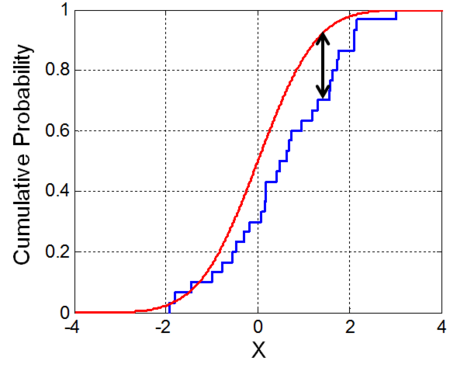